In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r"C:\Users\Ameya\Desktop\archive\Unemployment_Rate_upto_11_2020.csv")
data1=pd.DataFrame(data)
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [4]:
print(data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [5]:
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [6]:
data.isnull().sum()


data.dropna(inplace=True)
data[' Date'] = pd.to_datetime(data[' Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(4),

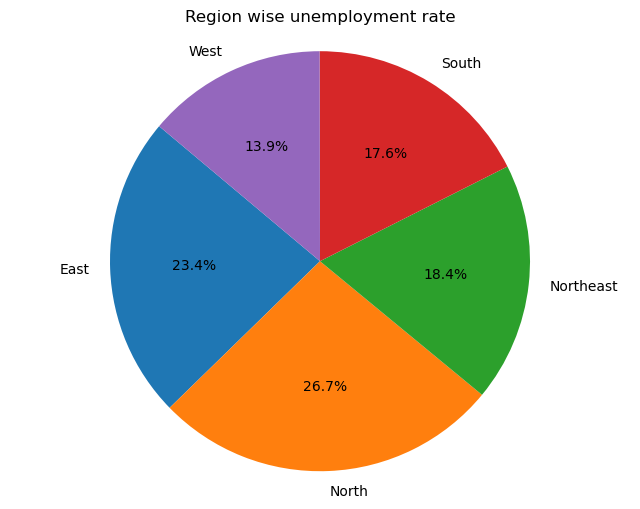

In [48]:
mean_unemployment = data1.groupby('Region.1')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8, 6))
plt.pie(mean_unemployment, labels=mean_unemployment.index, autopct='%1.1f%%', startangle=140)
plt.title('Region wise unemployment rate')
plt.axis('equal')
plt.show()

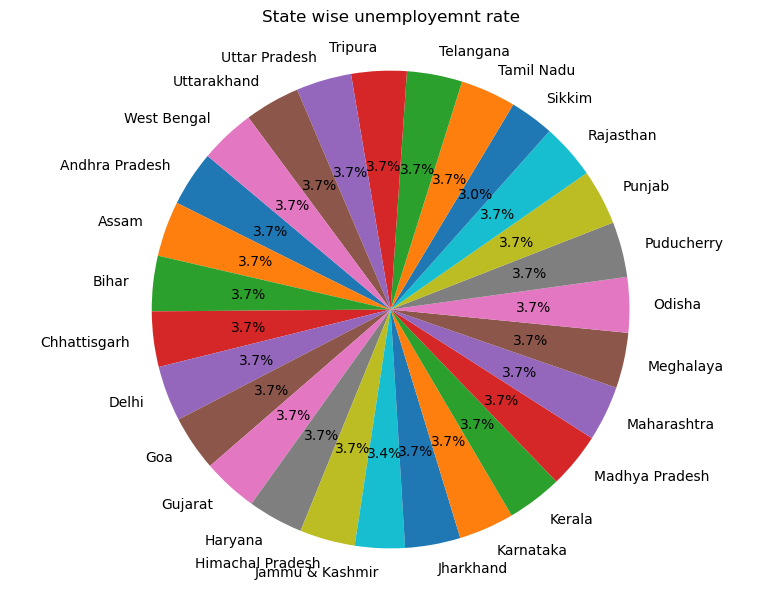

In [49]:
region = data1.groupby('Region').size()
percentages = region / region.sum() * 100

plt.figure(figsize=(8, 6))
plt.pie(region, labels=region.index, autopct='%1.1f%%', startangle=140)
plt.title('State wise unemployemnt rate\n')
plt.axis('equal')
plt.tight_layout()
plt.show()

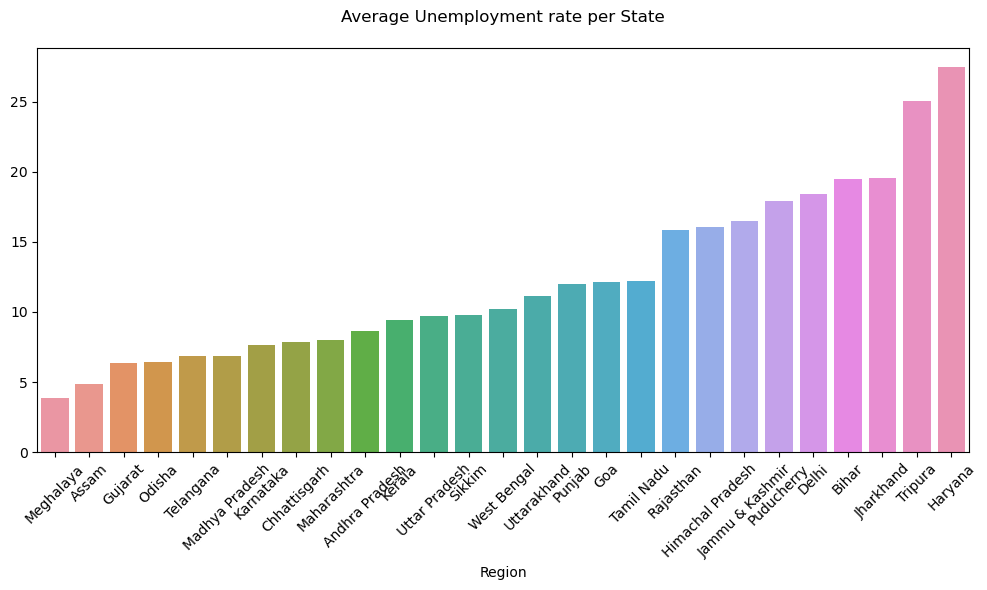

In [45]:
temp = data1.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=temp.index, y=temp.values)
plt.title("Average Unemployment rate per State\n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

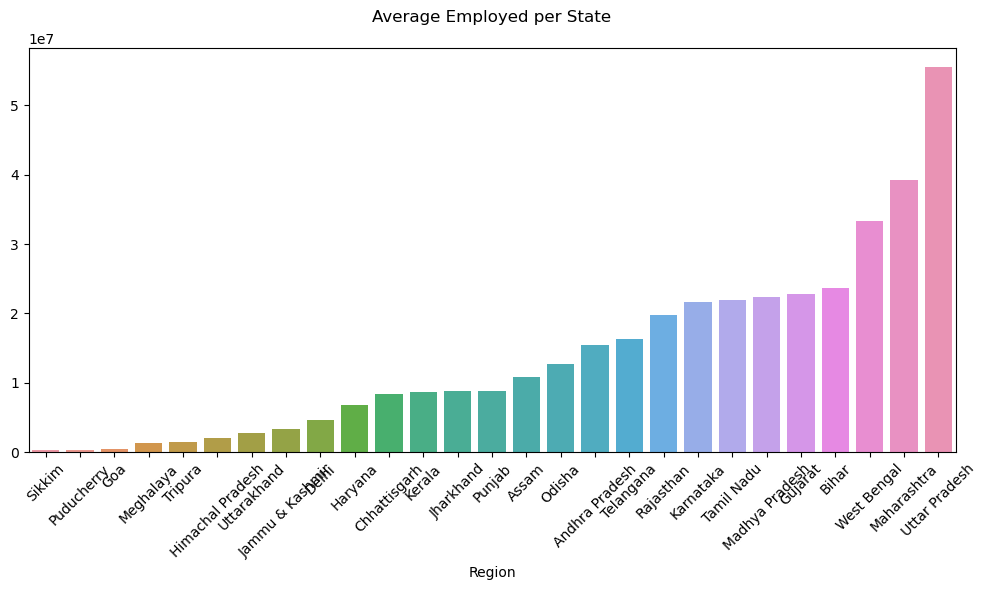

In [53]:
temp1 = data1.groupby('Region')[' Estimated Employed'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=temp1.index, y=temp1.values)
plt.title("Average Employed per State\n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
mean_unemployment = data1.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

highest_unemployment_region = mean_unemployment.idxmax()
highest_unemployment_rate = mean_unemployment.max()

print("Region with highest unemployment rate:",highest_unemployment_region)
print("Highest unemployment rate:",highest_unemployment_rate,"%")

Region with highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997 %


In [54]:
mean_employment = data1.groupby('Region')[' Estimated Employed'].mean()

highest_employment_region = mean_employment.idxmax()
highest_employment = mean_employment.max()

print("Region with highest employment:",highest_employment_region)
print("Highest employment:",highest_employment)

Region with highest employment: Uttar Pradesh
Highest employment: 55524799.0
